# 데이터 로드하기

## 미세먼지 (2021년 04월)

### 측정일시 : 4월 전체

### 측정항목
- SO2 = 산소포화량	
- CO  = 일산화탄소
- O3 = 오존	
- NO2 = 이산화질소	
- PM10 = 미세먼지	
- PM25 = 초미세먼지

In [1]:
# 라이브러리 로드하기
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [2]:
# 한글폰트 설정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)

In [3]:
# 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\user\AppData\Local\Temp/ipykernel_10732/1336414531.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


## 미세먼지(4월) 로드하기

In [4]:
# 파일 로드
df = pd.read_csv("Data/2021.04_미세먼지.csv",encoding="cp949",sep=",") # ,로 구분되어 있기때문에 이렇게 지정해주어야함
df.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2021040101,0.003,0.6,0.003,0.057,39.0,20.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2021040102,0.003,0.6,0.003,0.055,37.0,18.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2021040103,0.003,0.6,0.006,0.052,41.0,23.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2021040104,0.003,0.5,0.019,0.033,36.0,17.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2021040105,0.003,0.5,0.018,0.033,38.0,19.0,서울 중구 덕수궁길 15


In [44]:
df.describe()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25,일
count,427308.000000,4.273080e+05,408378.000000,405405.000000,407527.000000,408144.000000,410622.000000,409986.000000,427308.000000
mean,376614.356708,2.021042e+09,0.002934,0.382490,0.042666,0.015211,41.813549,17.413192,15.506305
std,229697.307469,8.655847e+02,0.001835,0.149839,0.018376,0.011979,28.747922,10.594976,8.655570
min,111121.000000,2.021040e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,131584.000000,2.021041e+09,0.002000,0.300000,0.031000,0.007000,24.000000,10.000000,8.000000
50%,336223.000000,2.021042e+09,0.003000,0.400000,0.043000,0.011000,36.000000,15.000000,16.000000
75%,534463.000000,2.021042e+09,0.003000,0.500000,0.054000,0.020000,52.000000,23.000000,23.000000
max,831495.000000,2.021043e+09,0.161000,5.300000,0.176000,0.155000,615.000000,440.000000,30.000000


In [5]:
# datetime 라이브러리 사용하기
from dateutil.parser import parse
date = 20210401120000
date = str(date)
print(parse(date))

2021-04-01 12:00:00


# 측정일시 년,월,일로 나누기

## datetime 라이브러리 사용하기

- 날짜를 변경하는 이유 : 날짜 형태가 숫자로 되어있는데 날짜별로 미세먼지의 수치를 수치화하기 위해서 날짜를 나누어야 한다.

1. df_time에 날짜가 들어있는 df["측정일시"]를 넣는다.
2. str 문자로 변경한다.
3. 뒤에 0000을 더해준다. (문자 더하기)
4. 24시는 오류가 뜨기 때문에 240000을 000000으로 바꾸어준다.
5. datetime / strftime을 이용한다.

In [57]:
# 측정일시 나누기
# datetime 라이브러리를 사용하는데 형식을 맞춰주어야 하므로 0000을 붙여주고 시작하기

def append_time(date):
    date = str(date) # 문자로 변환
    time = '000' # 뒤에 이어붙일 문자
    date = date + time
    print(date)

In [6]:
# 측정일시 df_time 변수에 따로 담아주기 1
df_time = df["측정일시"]
df_time

0         2021040101
1         2021040102
2         2021040103
3         2021040104
4         2021040105
             ...    
427303    2021043020
427304    2021043021
427305    2021043022
427306    2021043023
427307    2021043024
Name: 측정일시, Length: 427308, dtype: int64

### str(df_time)을 사용하면 안되는 이유

- str(df_time)은 행 전체를 문자로 변환해 준다.
- 예). df_time = ("123", "456", "789", "012") 이렇게 있으면 -> "123456789012" 이렇게 통째로 문자열이 되어버린다.

In [7]:
# df_time 문자로 변환해주기 2 
df_time= df_time.astype('str')
df_time

0         2021040101
1         2021040102
2         2021040103
3         2021040104
4         2021040105
             ...    
427303    2021043020
427304    2021043021
427305    2021043022
427306    2021043023
427307    2021043024
Name: 측정일시, Length: 427308, dtype: object

### 000을 붙여주는 이유

- 형식이 맞아야 datetime을 사용할 수 있기 때문이다.
- 예). 202104010101 -> 2021 / 04 / 01 / 01 / 01 / 01 -> 년 / 월 / 일 / 시간 / 분 / 초

In [8]:
# 뒤에 000붙여주기

time = '0000'
df_time = df_time + time
df_time

0         20210401010000
1         20210401020000
2         20210401030000
3         20210401040000
4         20210401050000
               ...      
427303    20210430200000
427304    20210430210000
427305    20210430220000
427306    20210430230000
427307    20210430240000
Name: 측정일시, Length: 427308, dtype: object

### 24시를 00시로 바꾸어 주는 이유

- 24시는 %H에서 오류가 나기 때문에 00시로 바꾸어주여야 한다. 0~23시까지 가능

In [9]:
# 24시를 00시로 바꾸어 주기
df_time = df_time.str.replace('240000','000000')
df_time

0         20210401010000
1         20210401020000
2         20210401030000
3         20210401040000
4         20210401050000
               ...      
427303    20210430200000
427304    20210430210000
427305    20210430220000
427306    20210430230000
427307    20210430000000
Name: 측정일시, Length: 427308, dtype: object

In [10]:
#import pandas as pd
#import numpy as np
import datetime

df['date'] = pd.to_datetime(df_time).dt.strftime('%Y-%m-%d-%H시')
df[['date']]

,date
0,2021-04-01-01시
1,2021-04-01-02시
2,2021-04-01-03시
3,2021-04-01-04시
4,2021-04-01-05시
...,...
427303,2021-04-30-20시
427304,2021-04-30-21시
427305,2021-04-30-22시
427306,2021-04-30-23시


In [307]:
# 연습
pd.to_datetime('20210401011111').strftime('%Y-%m-%d,%H')


'2021-04-01/01'

In [10]:
# 시간으로 변환해주기 (실패)
df['Datetime'] = pd.to_datetime(df_time, format="%Y-%m-%d-%H")
df['Datetime']

ValueError: time data '20210401010000' does not match format '%Y-%m-%d-%H' (match)

In [11]:
df.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,date
0,서울 중구,도시대기,111121,중구,2021040101,0.003,0.6,0.003,0.057,39.0,20.0,서울 중구 덕수궁길 15,2021-04-01-01시
1,서울 중구,도시대기,111121,중구,2021040102,0.003,0.6,0.003,0.055,37.0,18.0,서울 중구 덕수궁길 15,2021-04-01-02시
2,서울 중구,도시대기,111121,중구,2021040103,0.003,0.6,0.006,0.052,41.0,23.0,서울 중구 덕수궁길 15,2021-04-01-03시
3,서울 중구,도시대기,111121,중구,2021040104,0.003,0.5,0.019,0.033,36.0,17.0,서울 중구 덕수궁길 15,2021-04-01-04시
4,서울 중구,도시대기,111121,중구,2021040105,0.003,0.5,0.018,0.033,38.0,19.0,서울 중구 덕수궁길 15,2021-04-01-05시


In [12]:
# 지역을 확인하기 위해 출력
df_region = df["지역"]
df_region.unique()

array(['서울 중구', '서울 용산구', '서울 종로구', '서울 광진구', '서울 성동구', '서울 중랑구',
       '서울 동대문구', '서울 성북구', '서울 도봉구', '서울 은평구', '서울 서대문구', '서울 마포구',
       '서울 강서구', '서울 구로구', '서울 영등포구', '서울 동작구', '서울 관악구', '서울 강남구',
       '서울 서초구', '서울 송파구', '서울 강동구', '서울 금천구', '서울 강북구', '서울 양천구',
       '서울 노원구', '경기 수원시', '경기 성남시', '경기 의정부시', '경기 안양시', '경기 광명시',
       '경기 안산시', '경기 과천시', '경기 구리시', '경기 의왕시', '경기 시흥시', '경기 남양주시',
       '경기 평택시', '경기 파주시', '경기 고양시', '경기 광주시', '경기 용인시', '경기 이천시',
       '경기 포천시', '경기 김포시', '경기 군포시', '경기 오산시', '경기 하남시', '경기 화성시',
       '경기 양주시', '경기 동두천시', '경기 안성시', '경기 여주시', '경기 연천군', '경기 가평군',
       '경기 양평군', '강원 춘천시', '강원 양구군', '강원 동해시', '강원 철원군', '강원 화천군',
       '강원 인제군', '강원 고성군', '부산 중구', '부산 동구', '부산 영도구', '부산 부산진구',
       '부산 동래구', '부산 남구', '부산 사상구', '부산 북구', '부산 금정구', '부산 해운대구',
       '부산 사하구', '부산 강서구', '부산 연제구', '부산 기장군', '부산 수영구', '부산 서구',
       '경남 창원시', '울산 동구', '울산 중구', '울산 남구', '울산 울주군', '울산 북구', '경남 진주시',
       '경남 하동군', '경남 김해시', '경남 거제시', '경남 사천시', '경남 양산시

In [13]:
# 서울이 들어간 지역만 뽑아서 넣기
df_region = df.loc[df["지역"].str.contains("서울"),"지역"].copy()
df_region = df_region.unique()
df_region

array(['서울 중구', '서울 용산구', '서울 종로구', '서울 광진구', '서울 성동구', '서울 중랑구',
       '서울 동대문구', '서울 성북구', '서울 도봉구', '서울 은평구', '서울 서대문구', '서울 마포구',
       '서울 강서구', '서울 구로구', '서울 영등포구', '서울 동작구', '서울 관악구', '서울 강남구',
       '서울 서초구', '서울 송파구', '서울 강동구', '서울 금천구', '서울 강북구', '서울 양천구',
       '서울 노원구'], dtype=object)

In [29]:
# count가 왜 안되는지 모르겠음
df_region.count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [17]:
# df["date"]의 값을 df_day에 넣어서 문자로 변경해주어야 split사용가능
df_day = df["date"]
df_day

0         2021-04-01-01시
1         2021-04-01-02시
2         2021-04-01-03시
3         2021-04-01-04시
4         2021-04-01-05시
               ...      
427303    2021-04-30-20시
427304    2021-04-30-21시
427305    2021-04-30-22시
427306    2021-04-30-23시
427307    2021-04-30-00시
Name: date, Length: 427308, dtype: object

In [18]:
# 문자 변경
df_day= df_day.astype('str')
df_day

0         2021-04-01-01시
1         2021-04-01-02시
2         2021-04-01-03시
3         2021-04-01-04시
4         2021-04-01-05시
               ...      
427303    2021-04-30-20시
427304    2021-04-30-21시
427305    2021-04-30-22시
427306    2021-04-30-23시
427307    2021-04-30-00시
Name: date, Length: 427308, dtype: object

In [20]:
# 안되나봄
# 전체가 문자로 바뀌어서 잘 안되는것 같음
str(df_day).split("-")[2]

'01'

In [19]:
def parse_day(date):
    day = date.split("-")[2]
    day = int(day)
    return day
y = parse_day(date)
y

IndexError: list index out of range

In [20]:
# 일만 넣기 -> 일별로 평균을 구해서 도표그릴 예정
df["일"] = df["date"].apply(parse_day)
df["일"]

0          1
1          1
2          1
3          1
4          1
          ..
427303    30
427304    30
427305    30
427306    30
427307    30
Name: 일, Length: 427308, dtype: int64

In [21]:
# 시간도 나누어주기
def parse_time(date):
    time = date.split("-")[3]
    # time = int(time)
    return time
y = parse_time(date)
y

IndexError: list index out of range

In [22]:
# 시간만 넣기 -> 시간별로 평균을 구해서 도표그릴 예정
df["시간"] = df["date"].apply(parse_time)
df["시간"]

0         01시
1         02시
2         03시
3         04시
4         05시
         ... 
427303    20시
427304    21시
427305    22시
427306    23시
427307    00시
Name: 시간, Length: 427308, dtype: object

In [23]:
df.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,date,일,시간
0,서울 중구,도시대기,111121,중구,2021040101,0.003,0.6,0.003,0.057,39.0,20.0,서울 중구 덕수궁길 15,2021-04-01-01시,1,01시
1,서울 중구,도시대기,111121,중구,2021040102,0.003,0.6,0.003,0.055,37.0,18.0,서울 중구 덕수궁길 15,2021-04-01-02시,1,02시
2,서울 중구,도시대기,111121,중구,2021040103,0.003,0.6,0.006,0.052,41.0,23.0,서울 중구 덕수궁길 15,2021-04-01-03시,1,03시
3,서울 중구,도시대기,111121,중구,2021040104,0.003,0.5,0.019,0.033,36.0,17.0,서울 중구 덕수궁길 15,2021-04-01-04시,1,04시
4,서울 중구,도시대기,111121,중구,2021040105,0.003,0.5,0.018,0.033,38.0,19.0,서울 중구 덕수궁길 15,2021-04-01-05시,1,05시


# 우선 일별 평균을 내어서 도표로 시각화 해보기

In [24]:
# 필요한 데이터프레임 뽑기

# df_april["지역"]

df_april = df.loc[(df["일"] == 1) & (df["지역"] == "서울 중구")].copy()
# df_april = df.loc[(df["일"] == 2) & (df["지역"] == "서울 중구")].copy()
df_april

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,date,일,시간
0,서울 중구,도시대기,111121,중구,2021040101,0.003,0.6,0.003,0.057,39.0,20.0,서울 중구 덕수궁길 15,2021-04-01-01시,1,01시
1,서울 중구,도시대기,111121,중구,2021040102,0.003,0.6,0.003,0.055,37.0,18.0,서울 중구 덕수궁길 15,2021-04-01-02시,1,02시
2,서울 중구,도시대기,111121,중구,2021040103,0.003,0.6,0.006,0.052,41.0,23.0,서울 중구 덕수궁길 15,2021-04-01-03시,1,03시
3,서울 중구,도시대기,111121,중구,2021040104,0.003,0.5,0.019,0.033,36.0,17.0,서울 중구 덕수궁길 15,2021-04-01-04시,1,04시
4,서울 중구,도시대기,111121,중구,2021040105,0.003,0.5,0.018,0.033,38.0,19.0,서울 중구 덕수궁길 15,2021-04-01-05시,1,05시
5,서울 중구,도시대기,111121,중구,2021040106,0.003,0.5,0.011,0.045,35.0,16.0,서울 중구 덕수궁길 15,2021-04-01-06시,1,06시
6,서울 중구,도시대기,111121,중구,2021040107,0.003,0.5,0.010,0.049,40.0,16.0,서울 중구 덕수궁길 15,2021-04-01-07시,1,07시
7,서울 중구,도시대기,111121,중구,2021040108,0.003,0.5,0.009,0.051,36.0,14.0,서울 중구 덕수궁길 15,2021-04-01-08시,1,08시
8,서울 중구,도시대기,111121,중구,2021040109,0.003,0.4,0.025,0.034,45.0,16.0,서울 중구 덕수궁길 15,2021-04-01-09시,1,09시
9,서울 중구,도시대기,111121,중구,2021040110,0.003,0.5,0.028,0.030,42.0,11.0,서울 중구 덕수궁길 15,2021-04-01-10시,1,10시


In [25]:
df.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,date,일,시간
0,서울 중구,도시대기,111121,중구,2021040101,0.003,0.6,0.003,0.057,39.0,20.0,서울 중구 덕수궁길 15,2021-04-01-01시,1,01시
1,서울 중구,도시대기,111121,중구,2021040102,0.003,0.6,0.003,0.055,37.0,18.0,서울 중구 덕수궁길 15,2021-04-01-02시,1,02시
2,서울 중구,도시대기,111121,중구,2021040103,0.003,0.6,0.006,0.052,41.0,23.0,서울 중구 덕수궁길 15,2021-04-01-03시,1,03시
3,서울 중구,도시대기,111121,중구,2021040104,0.003,0.5,0.019,0.033,36.0,17.0,서울 중구 덕수궁길 15,2021-04-01-04시,1,04시
4,서울 중구,도시대기,111121,중구,2021040105,0.003,0.5,0.018,0.033,38.0,19.0,서울 중구 덕수궁길 15,2021-04-01-05시,1,05시


In [26]:
# 일별로 평균 구하기
df_april = df.groupby(["지역","일"])["PM10"].mean()
# df_april.head()
pd.DataFrame(df_april)

PM10
지역     일            
강원 강릉시 1   62.291667
       2   57.666667
       3   33.875000
       4   19.750000
       5   18.208333
...              ...
충북 충주시 26  16.583333
       27  32.625000
       28  66.968750
       29  62.423913
       30  31.703297

[6870 rows x 1 columns]

In [27]:
# 인덱스를 컬럼으로 만들기
df_april_day = df_april.reset_index()
df_april_day.head()

,지역,일,PM10
0,강원 강릉시,1,62.291667
1,강원 강릉시,2,57.666667
2,강원 강릉시,3,33.875000
3,강원 강릉시,4,19.750000
4,강원 강릉시,5,18.208333


In [29]:
# 지역명이 서울 중구이면서 일별 그래프 그리기

df_april_seoul = df_april_day.loc[df_april_day["지역"] == "서울 중구"].copy()
df_april_seoul

,지역,일,PM10
4410,서울 중구,1,49.645833
4411,서울 중구,2,52.875000
4412,서울 중구,3,37.291667
4413,서울 중구,4,11.166667
4414,서울 중구,5,22.729167
4415,서울 중구,6,42.875000
4416,서울 중구,7,58.062500
4417,서울 중구,8,35.041667
4418,서울 중구,9,35.708333
4419,서울 중구,10,36.000000


In [33]:
# year_month.style.background_gradient()
df_april_seoul.round(2).astype(str).style.background_gradient() 

,지역,일,PM10
4410,서울 중구,1,49.65
4411,서울 중구,2,52.88
4412,서울 중구,3,37.29
4413,서울 중구,4,11.17
4414,서울 중구,5,22.73
4415,서울 중구,6,42.88
4416,서울 중구,7,58.06
4417,서울 중구,8,35.04
4418,서울 중구,9,35.71
4419,서울 중구,10,36.0


# 서울 중구의 4월 일별 미세먼지 그래프

- 가장 높은 수치는 16~22일 사이인것을 알 수 있다.
- 목적 : 서울 중구만 이렇게 나타나는 것인지 다른 지역도 그런것인지 확인하기 위해서 출력한다. 
- 지역별로 다르게 나타난다면 마케팅 등과 같은 것에 다르게 쓰여야 한다.

<AxesSubplot:xlabel='일'>

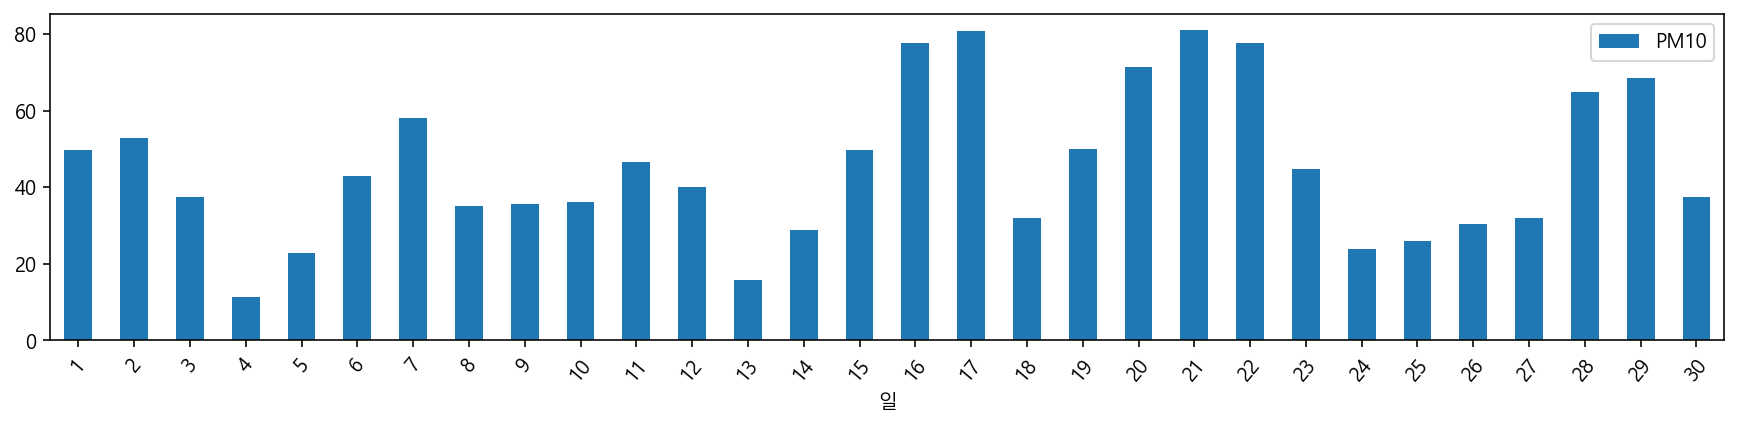

In [31]:
# 지역명이 서울 중구이면서 일별 그래프 그리기

df_april_seoul.plot.bar(x="일",rot=50,figsize=(15,3))

In [36]:

df_april_seoul_g = df_april_day.loc[df_april_day["지역"] == "서울 강남구"].copy()
df_april_Gyeonggi = df_april_day.loc[df_april_day["지역"] == "경기 성남시"].copy()

# 부산 해운대구
df_april_Busan = df_april_day.loc[df_april_day["지역"] == "부산 해운대구"].copy()

<AxesSubplot:xlabel='일'>

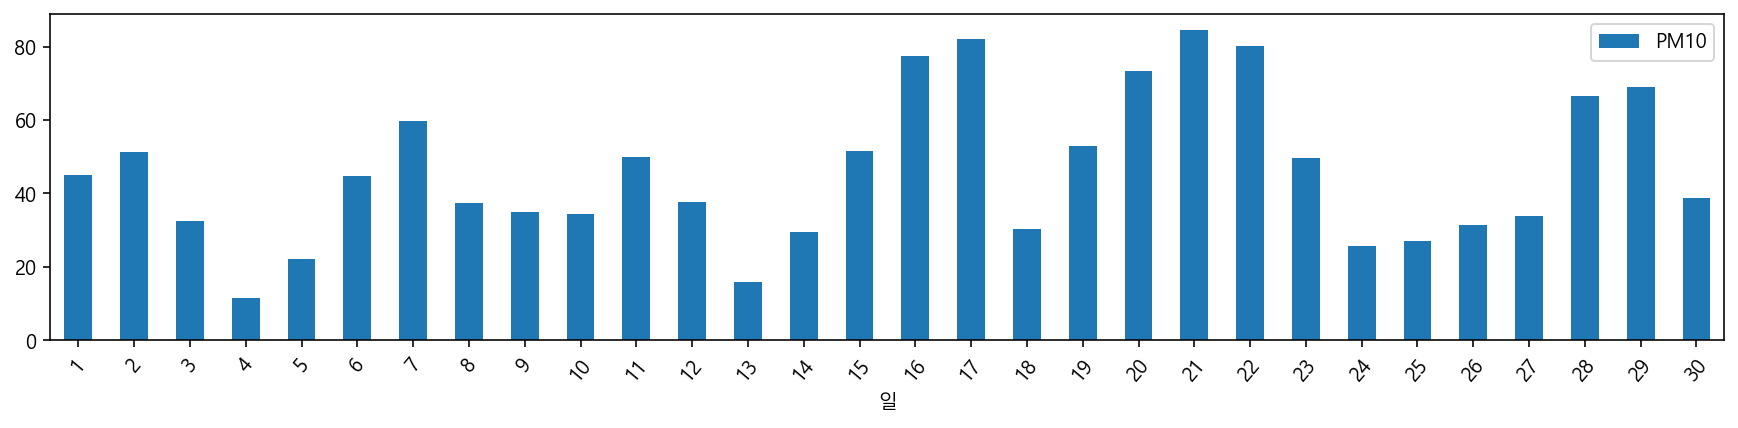

In [37]:
# 지역명이 서울 중구이면서 일별 그래프 그리기

df_april_seoul_g.plot.bar(x="일",rot=50,figsize=(15,3))

<AxesSubplot:xlabel='일'>

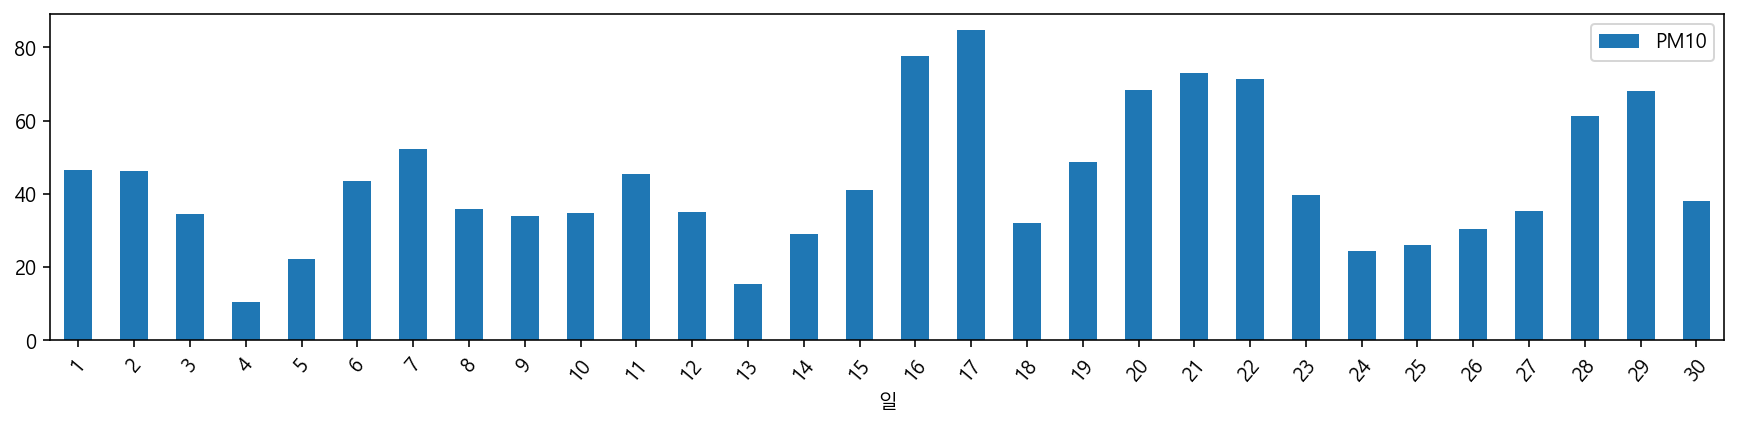

In [34]:
# 지역명이 서울 중구이면서 일별 그래프 그리기

df_april_Gyeonggi.plot.bar(x="일",rot=50,figsize=(15,3))

<AxesSubplot:xlabel='일'>

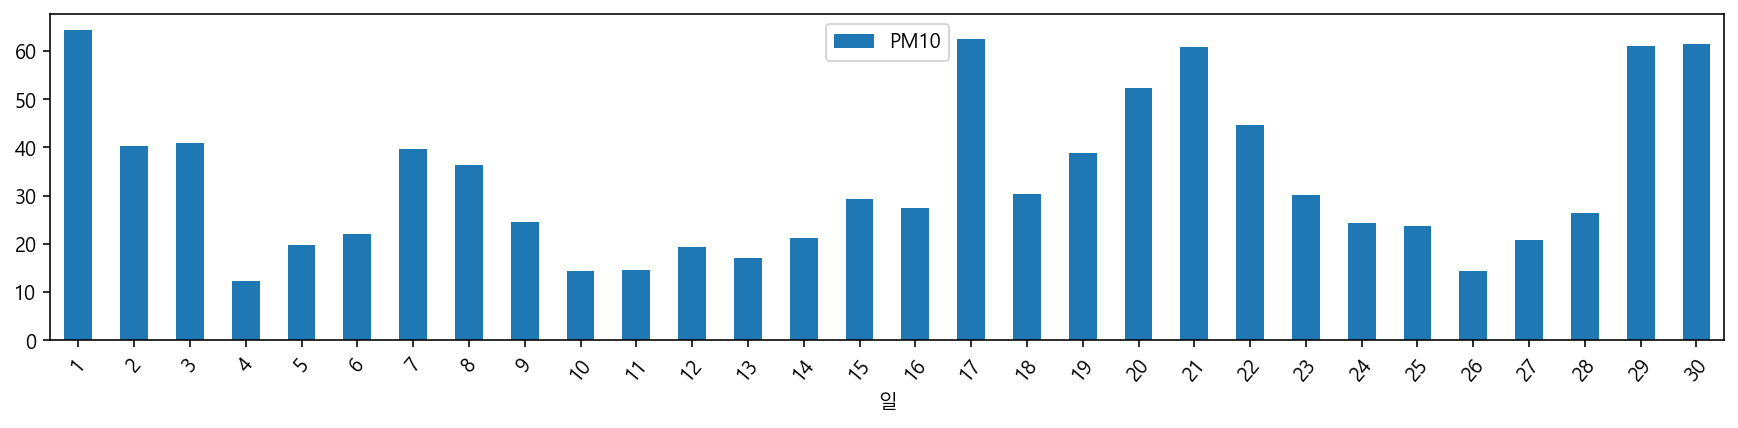

In [35]:
# df_april_Busan

df_april_Busan.plot.bar(x="일",rot=50,figsize=(15,3))

In [35]:
# 일별로 평균 구하기 (피봇 테이블 이용하기)
df_april = pd.pivot_table(data=df,index=["지역"], values="PM10", aggfunc="mean")
df_april

,PM10
지역,
강원 강릉시,44.567227
강원 고성군,39.990535
강원 동해시,49.359962
강원 삼척시,34.376224
강원 속초시,39.820084
...,...
충북 제천시,41.319328
충북 증평군,41.410367
충북 진천군,41.754545


In [39]:
# 인덱스를 컬럼으로 만들기
df_april = df_april.reset_index()
df_april.head()

,지역,PM10
0,강원 강릉시,44.567227
1,강원 고성군,39.990535
2,강원 동해시,49.359962
3,강원 삼척시,34.376224
4,강원 속초시,39.820084


In [116]:
# 필요없는 컬럼 삭제
# df_april = df_april.drop("망",axis=1)
df_april = df_april.drop("측정소코드",axis=1)
df_april = df_april.drop("측정소명",axis=1)
df_april = df_april.drop("측정일시",axis=1)
df_april = df_april.drop("주소",axis=1)

In [26]:
df_april.shape

(228, 2)

In [40]:
df_seoul = df_april.loc[df_april["지역"] == "서울"].copy()

In [41]:
# 지역이 서울인 것만 뽑기 loc 사용하면 지역만 나온다.
# loc(행,열)
df_seoul = df_april[df_april["지역"].str.contains("서울")]
df_seoul.head()
# df_seoul = pd.DataFrame(df_seoul)
# df_april.head(1)

,지역,PM10
124,서울 강남구,46.040559
125,서울 강동구,45.217179
126,서울 강북구,41.462937
127,서울 강서구,44.788624
128,서울 관악구,37.917598


# 서울 지역의 미세먼지 수치 그리기

## 한달 평균

<AxesSubplot:xlabel='지역'>

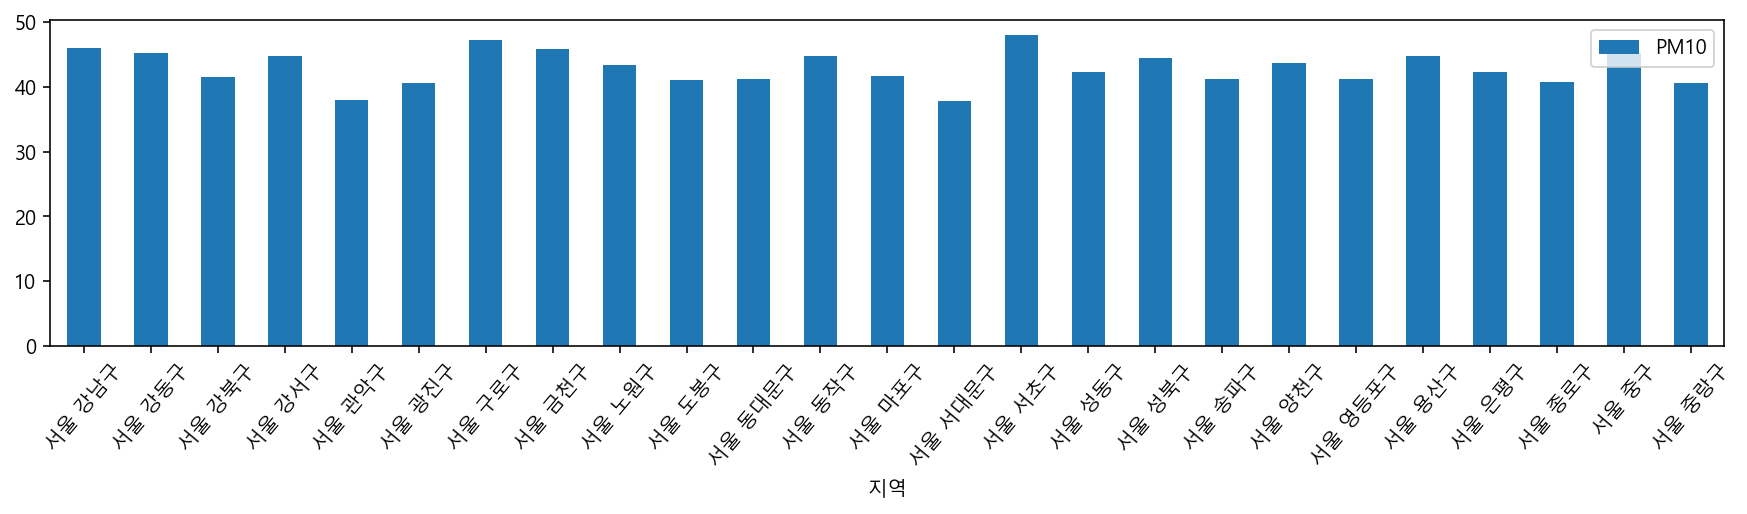

In [40]:
# 그래프 그리기 

df_seoul.plot.bar(x="지역",rot=50,figsize=(15,3))

<AxesSubplot:xlabel='지역'>

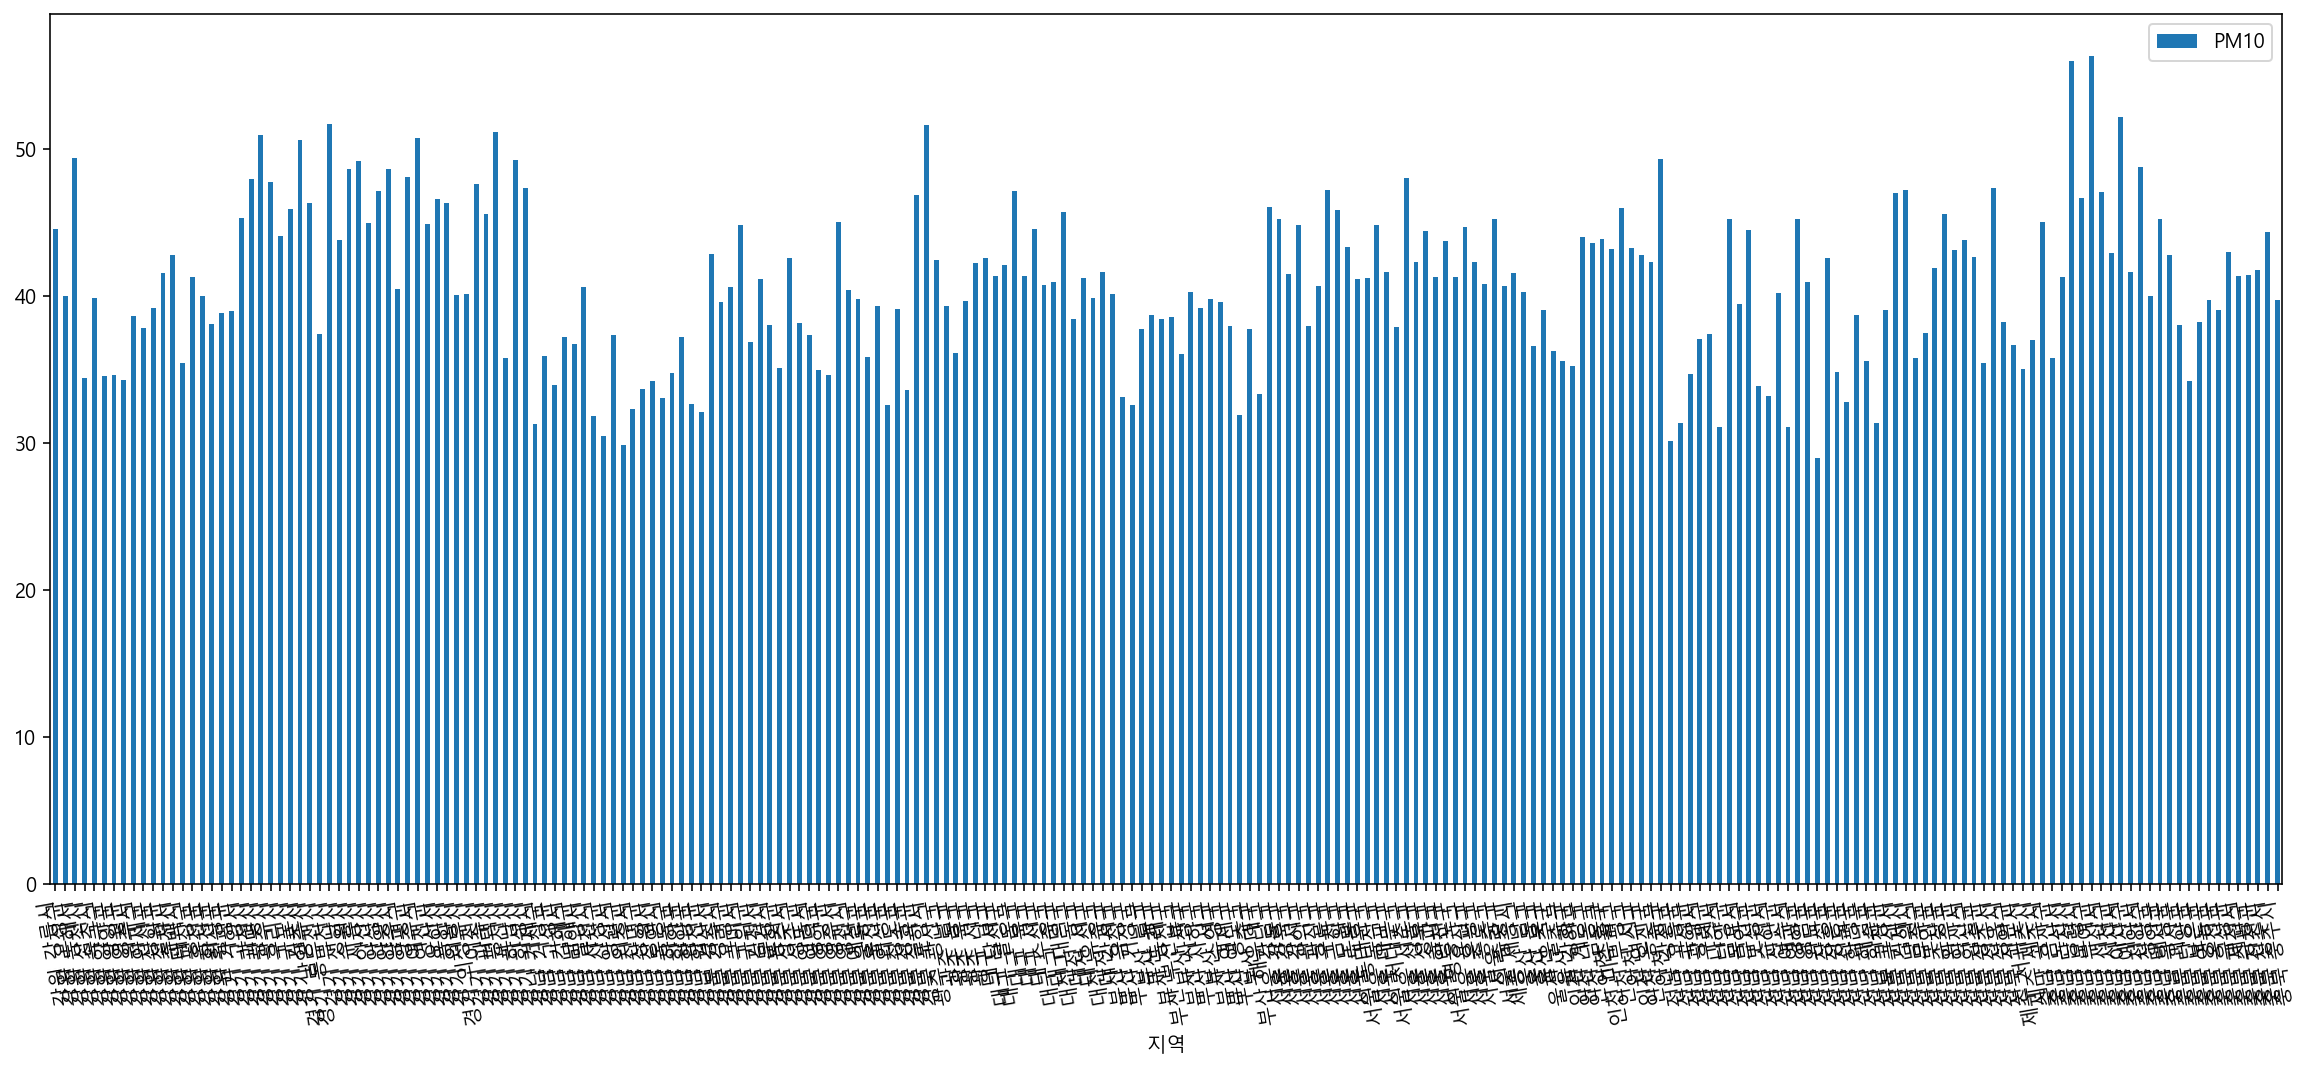

In [195]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(15,4))
df_april.plot.bar(x="지역",rot=100,figsize=(20,8))

In [186]:
# 서울 종로구인 지역의 일별 미세먼지 막대그래프 그리기
df_april[["지역"]] == '서울 용산구'

,지역
0,False
1,False
2,False
3,False
4,False
...,...
6804,False
6805,False
6806,False
6807,False
